In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df=pd.read_csv('/kaggle/input/openintro-possum/possum.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/openintro-possum/possum.csv'

In [3]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [6]:
df['Pop'].value_counts()

Pop
other    58
Vic      46
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Pop_encode']=encoder.fit_transform(df['Pop'])
df['sex_encode']=encoder.fit_transform(df['sex'])


In [8]:
df.isna().sum()

case          0
site          0
Pop           0
sex           0
age           2
hdlngth       0
skullw        0
totlngth      0
taill         0
footlgth      1
earconch      0
eye           0
chest         0
belly         0
Pop_encode    0
sex_encode    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   case        104 non-null    int64  
 1   site        104 non-null    int64  
 2   Pop         104 non-null    object 
 3   sex         104 non-null    object 
 4   age         102 non-null    float64
 5   hdlngth     104 non-null    float64
 6   skullw      104 non-null    float64
 7   totlngth    104 non-null    float64
 8   taill       104 non-null    float64
 9   footlgth    103 non-null    float64
 10  earconch    104 non-null    float64
 11  eye         104 non-null    float64
 12  chest       104 non-null    float64
 13  belly       104 non-null    float64
 14  Pop_encode  104 non-null    int64  
 15  sex_encode  104 non-null    int64  
dtypes: float64(10), int64(4), object(2)
memory usage: 13.1+ KB


In [10]:
df=df.dropna()

In [11]:
df=df.drop(['Pop','sex','case','site','age'],axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 103
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hdlngth     101 non-null    float64
 1   skullw      101 non-null    float64
 2   totlngth    101 non-null    float64
 3   taill       101 non-null    float64
 4   footlgth    101 non-null    float64
 5   earconch    101 non-null    float64
 6   eye         101 non-null    float64
 7   chest       101 non-null    float64
 8   belly       101 non-null    float64
 9   Pop_encode  101 non-null    int64  
 10  sex_encode  101 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 9.5 KB


In [13]:
X=df.drop('sex_encode',axis=1)
y=df['sex_encode']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

In [15]:
X_train

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Pop_encode
101,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0,1
94,91.6,56.6,88.5,37.5,64.5,45.4,14.9,27.0,31.0,1
29,92.1,54.4,84.0,33.5,70.6,50.8,14.5,24.5,33.0,0
80,90.6,56.0,85.5,38.0,65.6,41.7,17.0,27.5,35.0,1
5,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0,0
...,...,...,...,...,...,...,...,...,...,...
98,93.3,56.2,86.5,38.5,64.8,43.8,14.0,28.0,35.0,1
32,91.4,54.6,89.0,37.0,70.8,51.8,14.8,24.0,30.0,0
3,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0
30,92.8,54.1,93.0,37.0,68.0,52.5,14.5,27.0,31.0,0


In [16]:
df.corr()

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Pop_encode,sex_encode
hdlngth,1.000000,0.705901,0.670402,0.275155,0.415945,0.131576,0.354688,0.621068,0.545438,-0.041064,0.118705
skullw,0.705901,1.000000,0.506382,0.241027,0.297197,0.025293,0.314319,0.613842,0.444216,0.039545,0.104349
totlngth,0.670402,0.506382,1.000000,0.563586,0.483174,0.181230,0.247150,0.556094,0.500558,-0.133877,-0.152441
taill,0.275155,0.241027,0.563586,1.000000,-0.114560,-0.387871,0.192341,0.152924,0.296206,0.481018,-0.029907
footlgth,0.415945,0.297197,0.483174,-0.114560,1.000000,0.782415,0.013869,0.486477,0.311970,-0.791939,-0.137153
earconch,0.131576,0.025293,0.181230,-0.387871,0.782415,1.000000,-0.143869,0.241359,0.071309,-0.925583,-0.133683
eye,0.354688,0.314319,0.247150,0.192341,0.013869,-0.143869,1.000000,0.134730,0.242902,0.147726,0.212078
chest,0.621068,0.613842,0.556094,0.152924,0.486477,0.241359,0.134730,1.000000,0.609757,-0.241328,-0.117863
belly,0.545438,0.444216,0.500558,0.296206,0.311970,0.071309,0.242902,0.609757,1.000000,-0.048246,-0.093835
Pop_encode,-0.041064,0.039545,-0.133877,0.481018,-0.791939,-0.925583,0.147726,-0.241328,-0.048246,1.000000,0.207966


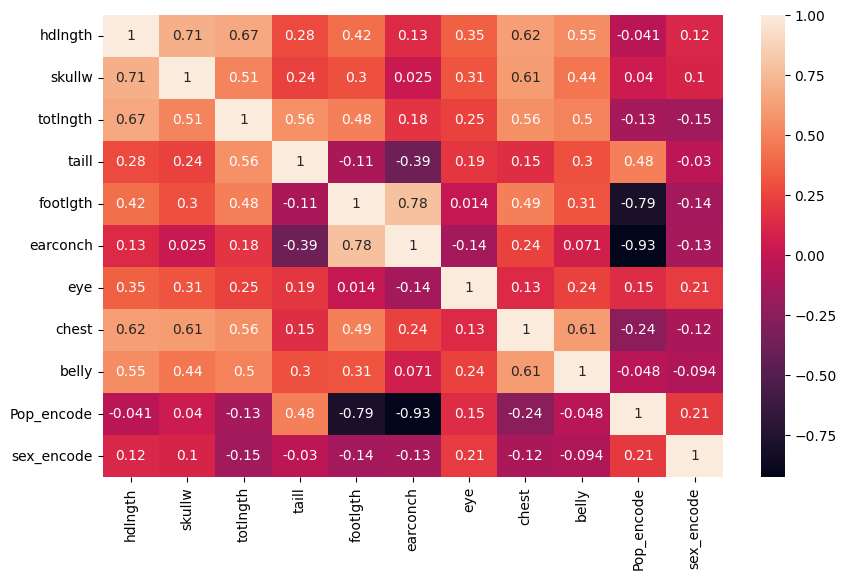

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [18]:
def correlation_for_dropping(df, threshold):
    columns_to_drop = set()
    corr = df.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                columns_to_drop.add(corr.columns[i])
    return columns_to_drop

In [19]:
columns_dropping = correlation_for_dropping(X_train, 0.85)

In [20]:
columns_dropping

{'Pop_encode'}

In [21]:
df=df.drop(['Pop_encode'],axis=1)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

In [23]:
X_train

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Pop_encode
101,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0,1
94,91.6,56.6,88.5,37.5,64.5,45.4,14.9,27.0,31.0,1
29,92.1,54.4,84.0,33.5,70.6,50.8,14.5,24.5,33.0,0
80,90.6,56.0,85.5,38.0,65.6,41.7,17.0,27.5,35.0,1
5,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0,0
...,...,...,...,...,...,...,...,...,...,...
98,93.3,56.2,86.5,38.5,64.8,43.8,14.0,28.0,35.0,1
32,91.4,54.6,89.0,37.0,70.8,51.8,14.8,24.0,30.0,0
3,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0
30,92.8,54.1,93.0,37.0,68.0,52.5,14.5,27.0,31.0,0


In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [26]:
y_pred=model.predict(X_test)

In [27]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1])

In [28]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [29]:
score=accuracy_score(y_pred,y_test)
print("score: " , score)
print(classification_report(y_pred,y_test))
print("confusion matrix: \n" , confusion_matrix(y_pred,y_test))

score:  0.6774193548387096
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        13
           1       0.72      0.72      0.72        18

    accuracy                           0.68        31
   macro avg       0.67      0.67      0.67        31
weighted avg       0.68      0.68      0.68        31

confusion matrix: 
 [[ 8  5]
 [ 5 13]]


In [30]:
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [31]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [32]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [33]:
## GridSearchCV
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [34]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [35]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [36]:
grid.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [37]:
grid.best_score_

0.5857142857142856

In [38]:
y_pred=grid.predict(X_test)

In [39]:
score=accuracy_score(y_pred,y_test)
print("score: " , score)
print(classification_report(y_pred,y_test))
print("confusion matrix: \n" , confusion_matrix(y_pred,y_test))

score:  0.5806451612903226
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.58      0.73        31

    accuracy                           0.58        31
   macro avg       0.50      0.29      0.37        31
weighted avg       1.00      0.58      0.73        31

confusion matrix: 
 [[ 0  0]
 [13 18]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
model=LogisticRegression()
randomcv=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,scoring='accuracy')

In [42]:
randomcv.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", l

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [43]:
randomcv.best_score_

0.4714285714285714

In [44]:
y_pred=randomcv.predict(X_test)

In [45]:
score=accuracy_score(y_pred,y_test)
print("score: " , score)
print(classification_report(y_pred,y_test))
print("confusion matrix: \n" , confusion_matrix(y_pred,y_test))

score:  0.7096774193548387
              precision    recall  f1-score   support

           0       0.46      0.75      0.57         8
           1       0.89      0.70      0.78        23

    accuracy                           0.71        31
   macro avg       0.68      0.72      0.68        31
weighted avg       0.78      0.71      0.73        31

confusion matrix: 
 [[ 6  2]
 [ 7 16]]


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
new_df=pd.read_csv('/kaggle/input/openintro-possum/possum.csv')

In [48]:
new_df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [49]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
new_df['Pop_encode']=encoder.fit_transform(new_df['Pop'])
new_df['sex_encode']=encoder.fit_transform(new_df['sex'])


In [50]:
new_df.isna().sum()

case          0
site          0
Pop           0
sex           0
age           2
hdlngth       0
skullw        0
totlngth      0
taill         0
footlgth      1
earconch      0
eye           0
chest         0
belly         0
Pop_encode    0
sex_encode    0
dtype: int64

In [51]:
new_df.dropna(axis=1,inplace=True)

In [52]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   case        104 non-null    int64  
 1   site        104 non-null    int64  
 2   Pop         104 non-null    object 
 3   sex         104 non-null    object 
 4   hdlngth     104 non-null    float64
 5   skullw      104 non-null    float64
 6   totlngth    104 non-null    float64
 7   taill       104 non-null    float64
 8   earconch    104 non-null    float64
 9   eye         104 non-null    float64
 10  chest       104 non-null    float64
 11  belly       104 non-null    float64
 12  Pop_encode  104 non-null    int64  
 13  sex_encode  104 non-null    int64  
dtypes: float64(8), int64(4), object(2)
memory usage: 11.5+ KB


In [53]:
new_df

,case,site,Pop,sex,hdlngth,skullw,totlngth,taill,earconch,eye,chest,belly,Pop_encode,sex_encode
0,1,1,Vic,m,94.1,60.4,89.0,36.0,54.5,15.2,28.0,36.0,0,1
1,2,1,Vic,f,92.5,57.6,91.5,36.5,51.2,16.0,28.5,33.0,0,0
2,3,1,Vic,f,94.0,60.0,95.5,39.0,51.9,15.5,30.0,34.0,0,0
3,4,1,Vic,f,93.2,57.1,92.0,38.0,52.2,15.2,28.0,34.0,0,0
4,5,1,Vic,f,91.5,56.3,85.5,36.0,53.2,15.1,28.5,33.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,89.5,56.0,81.5,36.5,46.8,14.8,23.0,27.0,1,1
100,101,7,other,m,88.6,54.7,82.5,39.0,48.0,14.0,25.0,33.0,1,1
101,102,7,other,f,92.4,55.0,89.0,38.0,45.4,13.0,25.0,30.0,1,0
102,103,7,other,m,91.5,55.2,82.5,36.5,45.9,15.4,25.0,29.0,1,1


In [54]:
new_df=new_df.drop(['Pop','sex','case','site',],axis=1)

In [55]:
new_df

,hdlngth,skullw,totlngth,taill,earconch,eye,chest,belly,Pop_encode,sex_encode
0,94.1,60.4,89.0,36.0,54.5,15.2,28.0,36.0,0,1
1,92.5,57.6,91.5,36.5,51.2,16.0,28.5,33.0,0,0
2,94.0,60.0,95.5,39.0,51.9,15.5,30.0,34.0,0,0
3,93.2,57.1,92.0,38.0,52.2,15.2,28.0,34.0,0,0
4,91.5,56.3,85.5,36.0,53.2,15.1,28.5,33.0,0,0
...,...,...,...,...,...,...,...,...,...,...
99,89.5,56.0,81.5,36.5,46.8,14.8,23.0,27.0,1,1
100,88.6,54.7,82.5,39.0,48.0,14.0,25.0,33.0,1,1
101,92.4,55.0,89.0,38.0,45.4,13.0,25.0,30.0,1,0
102,91.5,55.2,82.5,36.5,45.9,15.4,25.0,29.0,1,1


In [56]:
new_df=new_df.drop(['Pop_encode'],axis=1)

In [57]:
nX=new_df.drop('sex_encode',axis=1)

In [58]:
ny=new_df['sex_encode']

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(nX,ny,test_size=0.3,random_state=45)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [61]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [62]:
y_pred=svc.predict(X_test)

In [63]:
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.47      0.61        15
           1       0.67      0.94      0.78        17

    accuracy                           0.72        32
   macro avg       0.77      0.70      0.69        32
weighted avg       0.76      0.72      0.70        32

[[ 7  8]
 [ 1 16]]
